# Exploratory Data Analysis

In [32]:
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
# using Pandas insted of AWS Glue (DynamicFrame) because the data is only 404 rows
# AWS Glue would be selected if the data needs to be divided into workers

In [11]:
df = pd.read_csv(r"C:\Users\Ahmid\OneDrive\Documents\GitHub\My-Youtube-Journey-EDA\Data\data.csv")

In [12]:
df.shape

(404, 12)

In [13]:
df.columns

Index(['URL', 'channelTitle', 'commentCount', 'description', 'duration', 'id',
       'kind', 'likeCount', 'publishedAT', 'tags', 'videoTitle', 'viewCount'],
      dtype='object')

In [7]:
df.describe()

,commentCount,likeCount,viewCount
count,404.000000,404.000000,404.000000
mean,111.415842,1862.101485,35792.814356
std,147.916231,2029.460288,50702.086046
min,7.000000,142.000000,2444.000000
25%,34.000000,714.500000,8840.500000
50%,63.500000,1177.000000,18196.000000
75%,126.250000,2228.000000,42179.250000
max,1312.000000,14912.000000,467203.000000


In [8]:
df.head()

,URL,channelTitle,commentCount,description,duration,id,kind,likeCount,publishedAT,tags,videoTitle,viewCount
0,https://www.youtube.com/watch?v=tVUIcAanm3c,Artech - أرتك,111,التكنولوجي مش موبايلات بس، الموضوع أكبر من كده...,00:01:24,tVUIcAanm3c,youtube#video,2012,2019-02-22 13:00:18,"['Artech', 'تكنولوجي', 'the art of tech', 'هوا...",ARTech | ليه كل الموبايلات شبه بعض؟! ? THE ART...,87233
1,https://www.youtube.com/watch?v=0MgjIZ5G7m4,Artech - أرتك,48,أيهما أفضل في فئة الهواتف القابلة للطي: \nHuaw...,00:03:52,0MgjIZ5G7m4,youtube#video,1185,2019-02-25 10:46:30,"['ARTech', 'قناة ARTech', 'The ART of Tech', '...",الهواتف القابلة للطي | Galaxy Fold ? Mate X | ...,21344
2,https://www.youtube.com/watch?v=atQlcBQcsUg,Artech - أرتك,60,تجربة هاتف #Huawei_Mate X | أول #هاتف_قابل_للط...,00:01:45,atQlcBQcsUg,youtube#video,2693,2019-02-25 21:56:35,"['ARTech', 'Huawei Mate X', 'تجربة حصرية لهاتف...",تجربة هاتف Huawei Mate X القابل للطي | لأول م...,77409
3,https://www.youtube.com/watch?v=6cP2DJY0r6U,Artech - أرتك,52,ملخص سريع لمؤتمر #شاومي و #نوكيا من ضمن معرض #...,00:03:22,6cP2DJY0r6U,youtube#video,973,2019-02-26 19:04:33,"['ARTech', 'mwc 2019', 'mwc 2019 xiaomi', 'شاو...",إطلاق هاتف Nokia 9 PureView | ? وشاومي ترد ب ...,8393
4,https://www.youtube.com/watch?v=oXeggq05P-I&t=3s,Artech - أرتك,16,أغرب متجات شركة Nubia من معرض MWC 2019\nالساعة...,00:02:31,oXeggq05P-I,youtube#video,800,2019-02-27 18:01:14,"['ARTech', 'Arabhardware', 'nubia alpha smart ...",ساعة ولا موبايل ؟! | أغرب منتجات NUBIA من MWC,7858


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 165
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   URL           404 non-null    object        
 1   channelTitle  404 non-null    object        
 2   commentCount  404 non-null    int64         
 3   description   404 non-null    object        
 4   duration      404 non-null    object        
 5   id            404 non-null    object        
 6   kind          404 non-null    object        
 7   likeCount     404 non-null    int64         
 8   publishedAT   404 non-null    datetime64[ns]
 9   tags          404 non-null    object        
 10  videoTitle    404 non-null    object        
 11  viewCount     404 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 41.0+ KB


In [82]:
df.nunique()

URL             404
channelTitle      2
commentCount    188
description     401
duration        313
id              404
kind              1
likeCount       374
publishedAT     404
tags            396
videoTitle      404
viewCount       402
dtype: int64

In [90]:
df['publishedAT'] = pd.to_datetime(df['publishedAT'])

In [129]:
dft = pd.to_timedelta(df['duration'])
dft

0     0 days 00:01:24
1     0 days 00:03:52
2     0 days 00:01:45
3     0 days 00:03:22
4     0 days 00:02:31
            ...      
161   0 days 00:09:31
162   0 days 00:11:58
163   0 days 00:10:41
164   0 days 00:12:12
165   0 days 00:04:50
Name: duration, Length: 404, dtype: timedelta64[ns]

In [125]:
df["duration"]

0      00:01:24
1      00:03:52
2      00:01:45
3      00:03:22
4      00:02:31
         ...   
161    00:09:31
162    00:11:58
163    00:10:41
164    00:12:12
165    00:04:50
Name: duration, Length: 404, dtype: object

In [97]:
df.dtypes

URL                     object
channelTitle            object
commentCount             int64
description             object
duration                object
id                      object
kind                    object
likeCount                int64
publishedAT     datetime64[ns]
tags                    object
videoTitle              object
viewCount                int64
dtype: object

# Estimates of Location
## Using Mean, Trimmed Mean and Median

In [26]:
from scipy.stats import trim_mean

### Views Count

In [27]:
print("Mean: ",df.viewCount.mean())
print("Trimmed Mean: ",trim_mean(df.viewCount,0.1))
print("Median: ",df.viewCount.median())

Mean:  35792.81435643564
Trimmed Mean:  24840.527777777777
Median:  18196.0


### Likes Count

In [28]:
print("Mean: ",df.likeCount.mean())
print("Trimmed Mean: ",trim_mean(df.likeCount,0.1))
print("Median: ",df.likeCount.median())

Mean:  1862.101485148515
Trimmed Mean:  1449.4907407407406
Median:  1177.0


### Comment Count

In [29]:
print("Mean: ",df.commentCount.mean())
print("Trimmed Mean: ",trim_mean(df.commentCount,0.1))
print("Median: ",df.commentCount.median())

Mean:  111.41584158415841
Trimmed Mean:  79.56172839506173
Median:  63.5


# Estimates of Variance
## Using Standard Deviation - Interquartile Range

### Views Count 

In [22]:
print("Standard Deviation: ",df['viewCount'].std())
print("IQR: ",df['viewCount'].quantile(0.75) - df['viewCount'].quantile(0.25))

Standard Deviation:  50702.08604601062
IQR:  33338.75


### Likes Count

In [23]:
print("Standard Deviation: ",df['likeCount'].std())
print("IQR: ",df['likeCount'].quantile(0.75) - df['likeCount'].quantile(0.25))

Standard Deviation:  2029.4602876514036
IQR:  1513.5


### Comment Count

In [24]:
print("Standard Deviation: ",df['commentCount'].std())
print("IQR: ",df['commentCount'].quantile(0.75) - df['commentCount'].quantile(0.25))

Standard Deviation:  147.91623055658607
IQR:  92.25


## Boxplots

### Views Count 

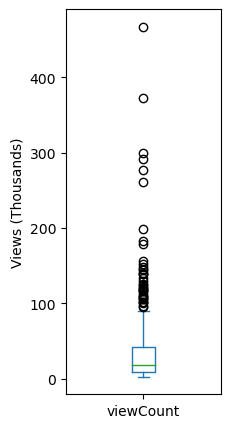

In [51]:
ax = (df.viewCount/1000).plot.box(figsize=(2, 5))
ax.set_ylabel('Views (Thousands)')
plt.show()

### Likes Count

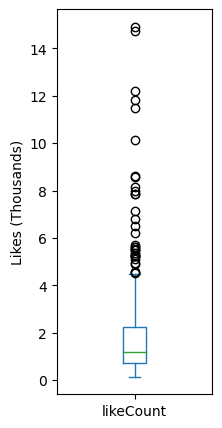

In [50]:
ax = (df.likeCount/1000).plot.box(figsize=(2, 5))
ax.set_ylabel('Likes (Thousands)')
plt.show()

### Comment Count

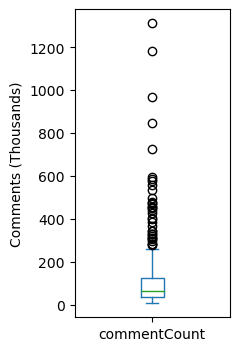

In [52]:
ax = (df.commentCount).plot.box(figsize=(2, 4))
ax.set_ylabel('Comments (Thousands)')
plt.show()